Data Loaded: (1000, 18)


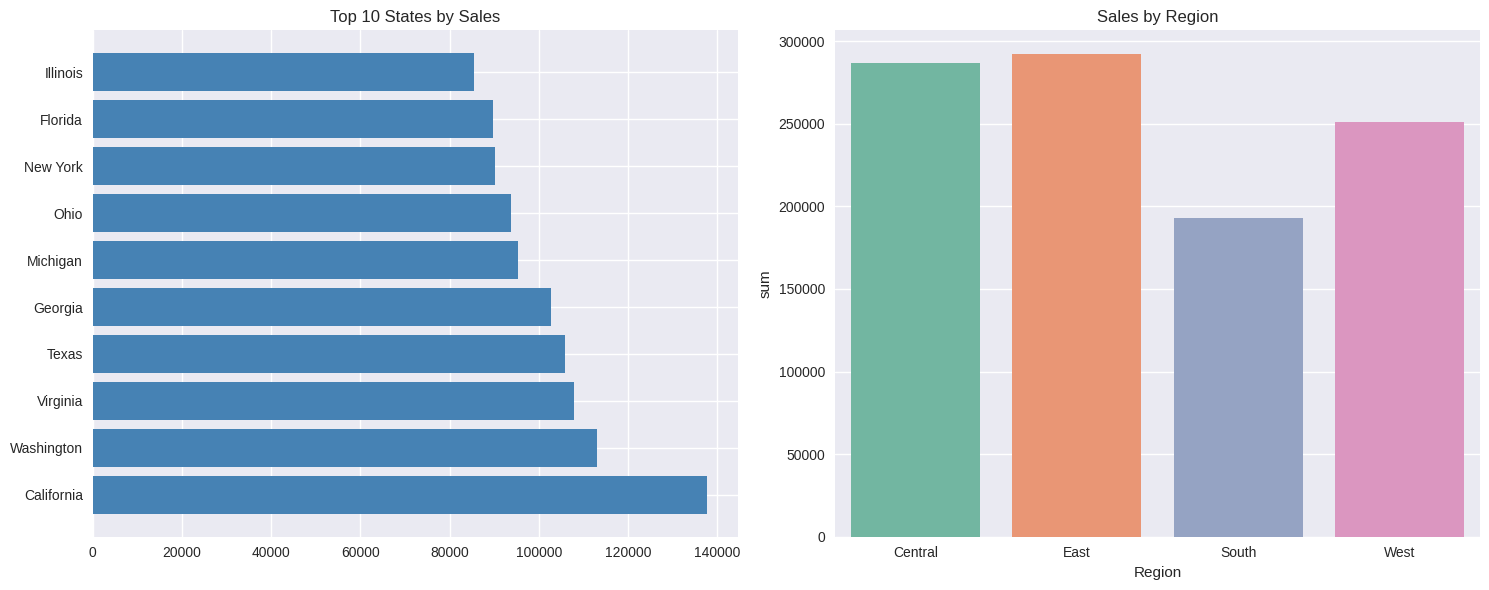

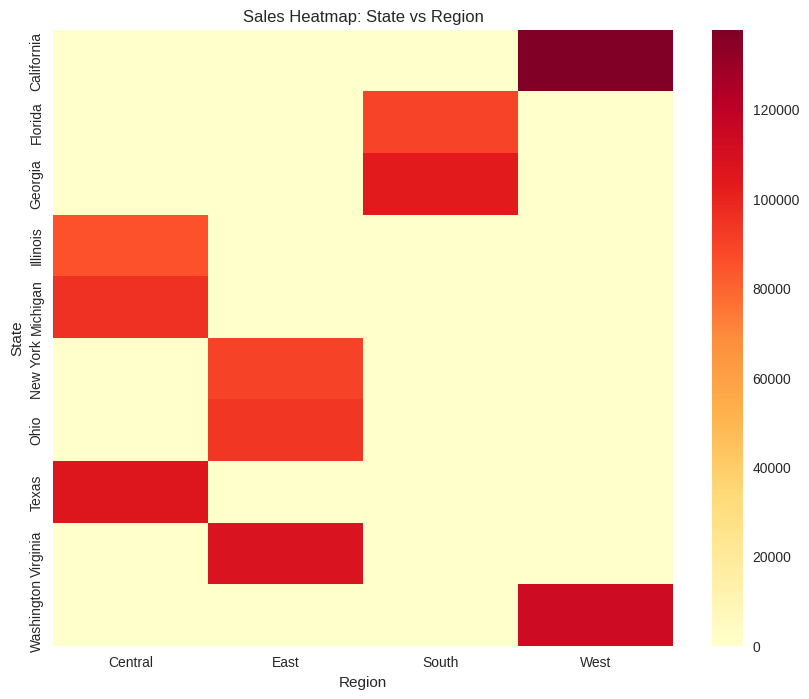


--- SUMMARY ---
Total States: 10, Total Sales: $1,022,379.04
Top 5 States:
         State  Total_Sales
0  California    137751.95
9  Washington    113155.20
8    Virginia    107963.77
7       Texas    105955.30
2     Georgia    102860.60
Sales by Region:
     Region        sum         mean
0  Central  286751.11  1006.144246
1     East  292016.75   963.751650
2    South  192704.03  1047.304511
3     West  250907.15  1100.469956


In [ ]:


import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, geopandas as gpd, folium, plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# -------------------------------
# 1. Load & Prepare Data
# -------------------------------
df = pd.read_csv("//Sample - Superstore.csv")
df['State'] = df['State'].str.strip()
print("Data Loaded:", df.shape)

# -------------------------------
# 2. Aggregate Sales by State & Region
# -------------------------------
state_sales = df.groupby('State')['Sales'].agg(['sum', 'count']).reset_index().sort_values('sum', ascending=False)
region_sales = df.groupby('Region')['Sales'].agg(['sum', 'mean']).reset_index()
state_sales.columns = ['State', 'Total_Sales', 'Order_Count']

# -------------------------------
# 3. Plotly Choropleth (Sales by State)
# -------------------------------
abbr = {'California':'CA','Texas':'TX','New York':'NY','Florida':'FL','Illinois':'IL','Washington':'WA','Ohio':'OH','Michigan':'MI','Virginia':'VA'}
state_sales['Abbr'] = state_sales['State'].map(abbr)

fig = px.choropleth(state_sales, locations='Abbr', locationmode='USA-states',
                    color='Total_Sales', scope='usa', color_continuous_scale='Blues',
                    title='Superstore Sales by State', hover_name='State')
fig.update_layout(title_x=0.5)
fig.show()

# -------------------------------
# 4. Basic Visuals (Top States & Regions)
# -------------------------------
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
top = state_sales.head(10)
ax[0].barh(top['State'], top['Total_Sales'], color='steelblue')
ax[0].set_title('Top 10 States by Sales')
sns.barplot(x='Region', y='sum', data=region_sales, ax=ax[1], palette='Set2')
ax[1].set_title('Sales by Region')
plt.tight_layout(); plt.show()

# -------------------------------
# 5. Folium Interactive Map
# -------------------------------
coords = {'California':[36.7,-119.4],'Texas':[31.9,-99.9],'New York':[40.7,-74.0],'Florida':[27.7,-81.5],'Illinois':[40.6,-89.4]}
m = folium.Map(location=[39.8,-98.6], zoom_start=4, tiles='CartoDB positron')

for _, row in state_sales.iterrows():
    if row['State'] in coords:
        lat, lon = coords[row['State']]
        folium.CircleMarker(
            [lat, lon],
            radius=np.log(row['Total_Sales'])*2,
            color='blue', fill=True,
            tooltip=f"{row['State']}: ${row['Total_Sales']:.0f}"
        ).add_to(m)
m.save("superstore_sales_map.html")

# -------------------------------
# 6. Heatmap: State vs Region
# -------------------------------
pivot = df.pivot_table(values='Sales', index='State', columns='Region', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title("Sales Heatmap: State vs Region")
plt.show()

# -------------------------------
# 7. Summary Insights
# -------------------------------
print("\n--- SUMMARY ---")
print(f"Total States: {len(state_sales)}, Total Sales: ${df['Sales'].sum():,.2f}")
print("Top 5 States:\n", state_sales.head(5)[['State','Total_Sales']])
print("Sales by Region:\n", region_sales)